In [75]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [77]:
Mdata = pd.read_csv('Medical_data.csv')

In [79]:
Mdata

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [81]:
Mdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [83]:
Mdata['ScheduledDay'] = pd.to_datetime(Mdata['ScheduledDay']).dt.date.astype('datetime64[ns]')
Mdata['AppointmentDay'] = pd.to_datetime(Mdata['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [85]:
Mdata

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [87]:
# 5 is saturday and 6 is sunday

Mdata ['sch_weekday'] = Mdata['ScheduledDay'].dt.dayofweek

In [89]:
Mdata ['apt_weekday'] = Mdata['AppointmentDay'].dt.dayofweek

In [91]:
Mdata['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [93]:
Mdata['apt_weekday'].value_counts()

apt_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [95]:
Mdata.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'apt_weekday'],
      dtype='object')

In [97]:
# Change the name of columns
Mdata = Mdata.rename(columns= {'Hipertension': 'Hypertension', 'Handcap':'Handicap','SMS_received':'SMSReceived','No-show':'NoShow'})

In [99]:
Mdata.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'apt_weekday'],
      dtype='object')

In [101]:
Mdata.describe()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,apt_weekday
count,1.105270e+05,1.105270e+05,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,3.920000e+04,5.030230e+06,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173180e+13,5.680573e+06,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439170e+13,5.725524e+06,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999820e+14,5.790484e+06,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,2.560949e+14,7.129575e+04,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


In [ ]:
Mdata['NoShow'].value_counts().plot(kind='bar', figsize=(8, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)
plt.show()

In [ ]:
100*Mdata['NoShow'].value_counts()/len(Mdata['NoShow'])

# calculating the % of appointments or not 

In [ ]:
Mdata['NoShow'].value_counts()

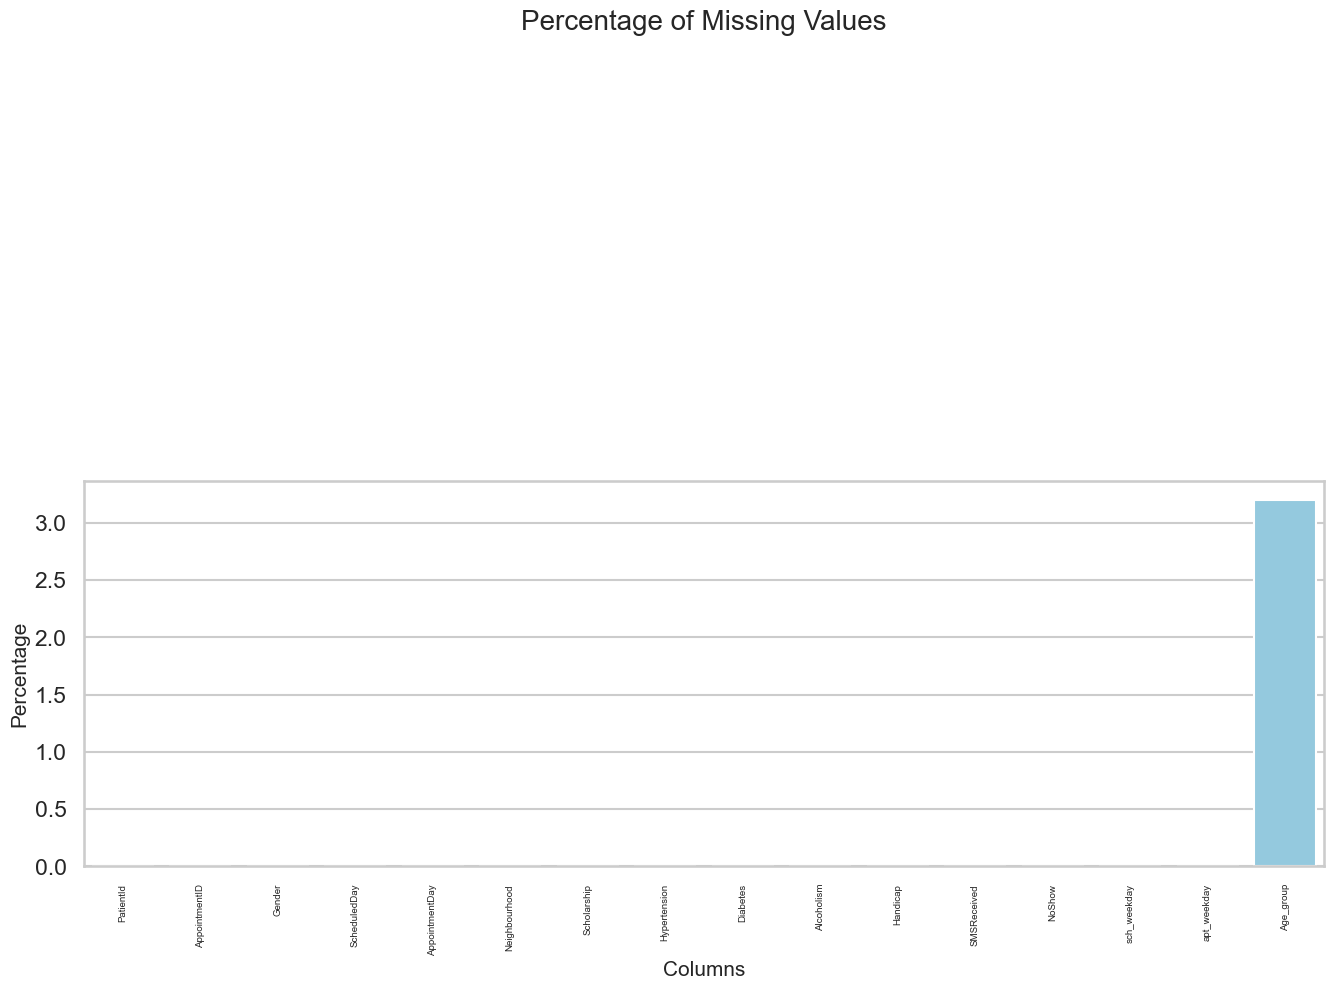

In [179]:
# Having a look that data contains missing values or not
missing = pd.DataFrame({'Column': Mdata.columns, 'Missing Percentage': (Mdata.isnull().sum() * 100) / Mdata.shape[0]})
plt.figure(figsize=(16, 5))
sns.barplot(x='Column', y='Missing Percentage', data=missing, color="skyblue")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


# Data Cleaning

In [181]:
new_Mdata = Mdata.copy()

In [183]:
new_Mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Neighbourhood   110527 non-null  object        
 6   Scholarship     110527 non-null  int64         
 7   Hypertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handicap        110527 non-null  int64         
 11  SMSReceived     110527 non-null  int64         
 12  NoShow          110527 non-null  int64         
 13  sch_weekday     110527 non-null  int32         
 14  apt_weekday     110527 non-null  int

In [189]:
print(Mdata['Age_group'].max())

101 - 121


In [191]:
# Creating Bins for Age group for 12 months
bins = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

Mdata['Age_group'] = pd.cut(Mdata.Age, range(1,130,20), right=False, labels= bins)

AttributeError: 'DataFrame' object has no attribute 'Age'

In [ ]:
Mdata.drop(['Age'], axis=1, inplace=True)


# Data exploration

In [193]:
list(Mdata.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'apt_weekday',
 'Age_group']

In [195]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(Mdata.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(Mdata[predictor].value_counts())  
    plt.figure(i)
    sns.countplot(data=Mdata, x=predictor, hue='NoShow')

---------- PatientId ----------
PatientId
8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
2.584240e+11    62
                ..
2.367500e+11     1
1.744680e+14     1
7.978390e+12     1
5.595420e+13     1
1.557660e+13     1
Name: count, Length: 61744, dtype: int64
---------- AppointmentID ----------
AppointmentID
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: count, Length: 110527, dtype: int64
---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
201

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


In [196]:
Mdata['NoShow'] = np.where(Mdata.NoShow == 'Yes',1,0)

In [197]:
Mdata.NoShow.value_counts()

NoShow
0    110527
Name: count, dtype: int64

# Converting all categorical data into dummy varibales

In [199]:
Mdata_dummies = pd.get_dummies(Mdata)
Mdata_dummies.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,...,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2.987250e+13,5642903,2016-04-29,2016-04-29,0,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,5.589980e+14,5642503,2016-04-29,2016-04-29,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,4.262960e+12,5642549,2016-04-29,2016-04-29,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,8.679510e+11,5642828,2016-04-29,2016-04-29,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,8.841190e+12,5642494,2016-04-29,2016-04-29,0,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(Mdata_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [202]:
new_df1_target0=Mdata.loc[Mdata["NoShow"]==0]
new_df1_target1=Mdata.loc[Mdata["NoShow"]==1]

In [203]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 325
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [ ]:
uniplot(new_df1_target1,'Hypertension','Distribution of Gender for NoShow Customers','Gender')


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
uniplot(new_df1_target0,'Hypertension','Distribution of Gender for NoShow Customers','Gender')


In [ ]:
uniplot(new_df1_target1,'Age_group','Distribution of Age for NoShow Customers','Gender')


In [ ]:
uniplot(new_df1_target1,'Age_group','Distribution of Age for NoShow Customers','Gender')


***********Analysis***********

Here’s a simplified and concise version of your findings:

1. More female patients have taken appointments than male patients.
2. The "NoShow" and "Show" ratio is almost equal for most age groups, except for Age 0 and Age 1, where 80% showed up.
3. All neighborhoods have about an 80% show rate.
4. Of the 99,666 patients without a scholarship, around 80% showed up; for the 21,801 patients with a scholarship, 75% showed up.
5. Around 78% of the 88,726 patients without hypertension showed up, and 85% of the 21,801 with hypertension showed up.
6. 80% of the 102,584 patients without diabetes showed up, while 83% of the 7,943 patients with diabetes showed up.
7. Of the 75,045 patients who didn’t receive SMS, 84% showed up; for the 35,482 who did receive SMS, 72% showed up.
8. There are no appointments on Sundays, and Saturday appointments are much fewer compared to other weekdays.
